In [111]:
import os
import numpy as np
import matplotlib.pyplot as plt
import argparse as ap
import h5py
from PIL import Image
from DataPoint import *
import cv2
import pickle
import random
import tensorflow as tf

In [164]:
def getData(file):
    filehandler = open(file, 'rb') 
    data = pickle.load(filehandler)
    filehandler.close()
    return data
def saveData(file, data):
    file_to_save = open(file, 'wb') 
    pickle.dump(data, file_to_save)
    file_to_save.close()
def hasRed(img):
    temp = np.copy(img)
    number_of_red = 0
    for x in range(len(temp)):
        for y in range(len(temp[x])):
            if (temp[x][y][0] > 100 and
                temp[x][y][1] >= 0 and temp[x][y][1] < 55 and
                temp[x][y][2] >= 0 and temp[x][y][2] < 55):
                number_of_red += 1
            if number_of_red > 500:
                return number_of_red
    return number_of_red
def makeDataHist(data):
    x = []

    for p in data:
        x.append(p.num_of_cubes)

    counts = np.bincount(x)

    print(counts[1:])
    fig, ax = plt.subplots()
    ax.bar(range(1,len(counts)), counts[1:], width = 1, align='center', ec='black')
    ax.set(xticks=range(len(counts)))
    plt.ylabel("Number of Frames")
    plt.xlabel("Number of Cubes")
    return fig

def rotImg(data, num_rot):
    img = np.copy(data.image)
    num_rot = num_rot%4
    if num_rot == 0 :
        num_rot = random.randint(1, 3)
    for i in range(num_rot):
        img = np.rot90(img)
    return DataPoint(img,data.num_of_cubes)
def flips(data):
    img = np.copy(data.image)
    flip1 = np.fliplr(img)
    flip2 = np.flipud(img)
    flip3 = np.fliplr(flip2)
    flip4 = np.flipud(flip1)
    temp = [DataPoint(flip1, data.num_of_cubes), DataPoint(flip2, data.num_of_cubes), DataPoint(flip3, data.num_of_cubes), DataPoint(flip4, data.num_of_cubes)]
    out_data = temp[:]
    for d in temp:
        for i in range(1,4):
            out_data.append(rotImg(d,i))
    return out_data

In [ ]:
file_list = [os.path.join('test/',item) for item in os.listdir('test/') if 'npy' in item]
# print(file_list)
first = True
for item in file_list:
    print(item)
    with h5py.File(item[:-4] + '_video.h5','r') as hf:
        if first:
            sideSeries = np.array(hf['video'][:])
            print("Here")
            first = False
        else:
            sideSeries = np.append(sideSeries,hf['video'][:],axis=0)
            
    print(sideSeries.shape)

frame = 200
plt.figure()
axList = [plt.subplot(2,3,i) for i in range(1,7)]


#RGBD of side, looking inside the cup (no cropping), or fixed
axList[0].imshow(sideSeries[frame,...])
axList[0].set_title('Side Camera')
axList[1].imshow(sideSeries[frame+1,...])
axList[1].set_title('Side Camera')
axList[2].imshow(sideSeries[frame+2,...])
axList[2].set_title('Side Camera')
axList[3].imshow(sideSeries[frame,...])
axList[3].set_title('Side Camera')
axList[4].imshow(sideSeries[frame+3,...])
axList[4].set_title('Side Camera')
axList[5].imshow(sideSeries[frame+4,...])
axList[5].set_title('Side Camera')


plt.tight_layout()
plt.show()



In [96]:
objects = []
for img in sideSeries:
    tempObject = DataPoint(img,0)
    objects.append(tempObject)

In [152]:
objects = getData('datasetWithCubes.obj')
alldata = getData('DatasetFinal.obj')
print(len(alldata))

45254


3
True


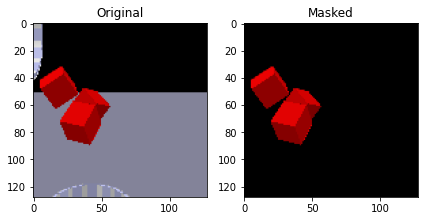

In [163]:
num = 595






print(alldata[num].num_of_cubes)
temp = np.copy(alldata[num].image)
for x in range(len(temp)):
    for y in range(len(temp[x])):
        if (temp[x][y][0] > 100 and
            temp[x][y][1] >= 0 and temp[x][y][1] < 50 and
            temp[x][y][2] >= 0 and temp[x][y][2] < 50):
            pass
        else:
            temp[x][y]=0
has_red = np.any(temp > 200)
print(has_red)

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(alldata[num].image)
axes[0].set_title("Original")
axes[1].imshow(temp)
axes[1].set_title("Masked")
fig.tight_layout()
fig.savefig("ReportFigs/filter.png")

In [50]:
for data in objects:
    data.image = data.image[128:,72:200,:]
print(objects[0].image.shape)

(128, 128, 3)


In [52]:
print(len(objects))
good_frames = []
for data in objects:
    if hasRed(data.image) > 40:
        good_frames.append(data)
        
        # print("hello")
print(len(good_frames))

38055
2104


In [54]:
print(len(good_frames))
saveData('datasetCroppedWithCubes.obj',good_frames)
# file_to_save = open('datasetCroppedWithCubes.obj', 'wb') 
# pickle.dump(good_frames, file_to_save)
# file_to_save.close()


2104


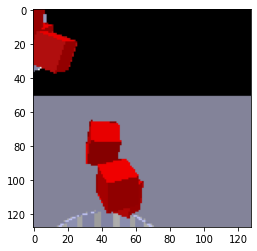

0
(128, 128, 3)


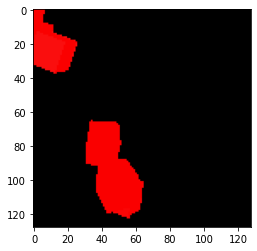

In [60]:
num = 1105
plt.figure()
plt.imshow(test[num].image[:,:,])
plt.show()
print(test[num].num_of_cubes)
temp = np.copy(test[num].image)
for x in range(len(temp)):
    for y in range(len(temp[x])):
        if (temp[x][y][0] > 100 and
            temp[x][y][1] >= 0 and temp[x][y][1] < 20 and
            temp[x][y][2] >= 0 and temp[x][y][2] < 20):
            temp[x][y][0] = 250
        else:
            temp[x][y]=0
has_red = np.any(temp > 200)
print(temp.shape)
plt.figure()
plt.imshow(temp)
plt.show()

3752


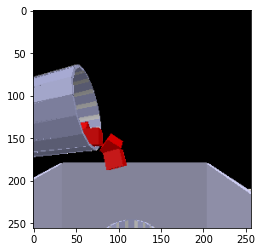

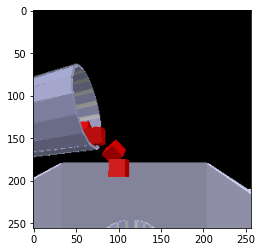

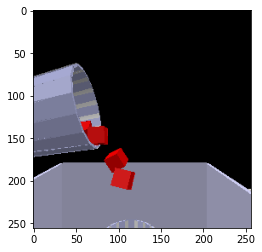

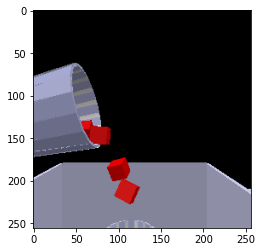

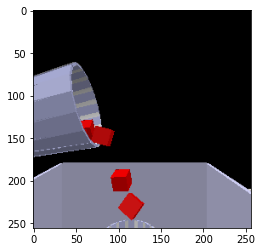

In [149]:
print(len(good_frames))
plt.figure()
plt.imshow(good_frames[1000].image)
plt.show()

plt.figure()
plt.imshow(good_frames[1001].image)
plt.show()

plt.figure()
plt.imshow(good_frames[1002].image)
plt.show()

plt.figure()
plt.imshow(good_frames[1003].image)
plt.show()

plt.figure()
plt.imshow(good_frames[1004].image)
plt.show()



In [133]:
file_to_save = open('datasetWithCubes.obj', 'wb') 
pickle.dump(good_frames, file_to_save)
file_to_save.close()


In [134]:
file = os.path.join('dataset/')
counter = 1

for img in good_frames:
    plt.figure()
    plt.imshow(img.image)
    plt.axis('off')
    plt.savefig(file+'test'+str(counter)+'.png')
    plt.close()
    counter +=1


    

In [13]:
filehandler = open('datasetWithCubes.obj', 'rb') 
test = pickle.load(filehandler)
filehandler.close()

file = os.path.join('dataset/')
counter = 1

for img in test:
    plt.figure()
    plt.imshow(img.image)
    plt.axis('off')
    plt.savefig(file+'test'+str(counter)+'.png')
    plt.close()
    counter +=1

In [3]:
data = getData('FinalDataset1.obj')
print(len(data))


974


In [5]:
print(data[0].image.shape)

(80, 256, 3)


In [9]:
batches = [b1,b2,b3,b4]
for i in range(1,5):
    file_to_save = open('batch'+str(i)+'.obj', 'wb') 
    pickle.dump(batches[i-1], file_to_save)
    file_to_save.close()

In [3]:
formatted_data = getData('FinalDataset.obj')

print(len(formatted_data))




2104


[883 508 226 155 109 105  67  25  15   4   2   3   2]


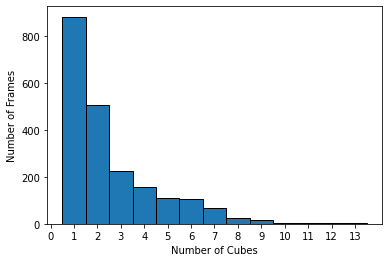

In [165]:
x = []

# for p in formatted_data:
#     x.append(p.num_of_cubes)

# counts = np.bincount(x)

# print(counts[1:])
# fig, ax = plt.subplots()
# ax.bar(range(1,14), counts[1:], width = 1, align='center', ec='black')
# ax.set(xticks=range(14))

# plt.show()

fig = makeDataHist(formatted_data)
plt.show()
fig.savefig("ReportFigs/original.png")

In [42]:
new_data = []
for point in formatted_data:
    if hasRed(point.image) > 199:
        new_data.append(point)
            


In [43]:
saveData("lessCubes.obj", new_data)

[450 443 224 155 109 105  67  25  15   4   2   3   2]


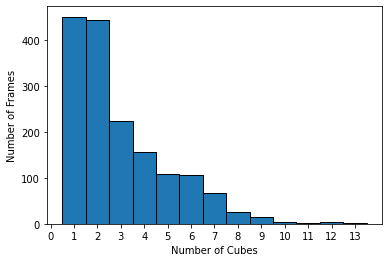

In [166]:
fig = makeDataHist(new_data)
plt.show()
fig.savefig("ReportFigs/originalLess.png")

In [60]:
data = []
for p in new_data:
    if p.num_of_cubes < 7:
        data.append(p)

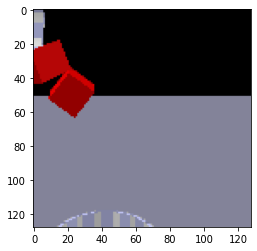

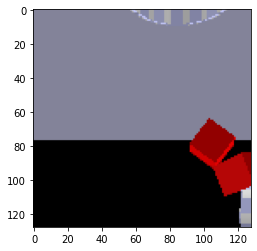

In [87]:
img = np.copy(data[4].image)

test_d = rotImg(data[4],2)

plt.figure()
plt.imshow(img)
plt.show()

plt.figure()
plt.imshow(test_d.image)
plt.show()

In [104]:
equal_data = data[:]
for p in data:
    if p.num_of_cubes == 3 :
        equal_data.append(rotImg(p,random.randint(1,3)))
    elif p.num_of_cubes == 4 :
        rots = random.sample(range(1, 4), 2)
        for r in rots:
            equal_data.append(rotImg(p,r))
    elif p.num_of_cubes == 5 or p.num_of_cubes == 6 :
        for r in range(1,4):
            equal_data.append(rotImg(p,r))
        

[450 443 448 465 436 420]


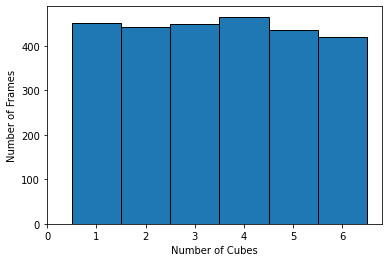

In [167]:
fig = makeDataHist(equal_data)
plt.show()
fig.savefig("ReportFigs/balance.png")

In [116]:
final_data = equal_data[:]

for p in equal_data:
    flipped_data = flips(p)
    for d in flipped_data:
        final_data.append(d)



[7650 7531 7616 7905 7412 7140]


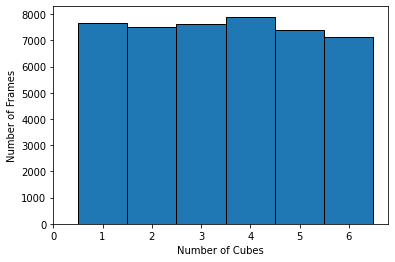

20


In [170]:
fig = makeDataHist(final_data)
plt.show()
fig.savefig("ReportFigs/balanceAugment.png")

f = [equal_data[5]]
for i in flips(equal_data[5]):
    f.append(i)

for r in range(1,4):
    f.append(rotImg(equal_data[5],r))

print(len(f))

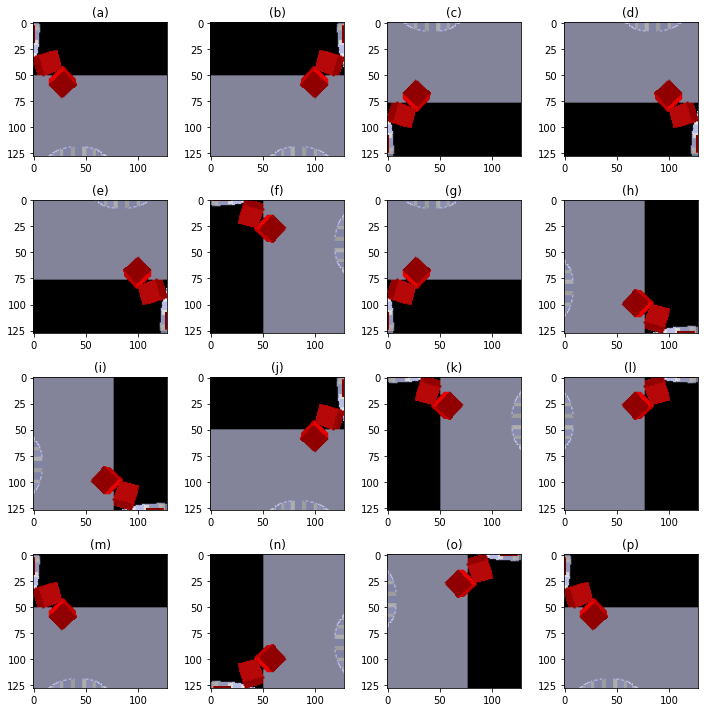

In [182]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10,10))
lables = ["(a)","(b)","(c)","(d)","(e)","(f)","(g)","(h)","(i)","(j)","(k)","(l)","(m)","(n)","(o)","(p)","(q)","(r)","(s)","(t)","(u)","(v)","(w)","(x)","(y)","(z)"]
counter = 0
for r in range(4):
    for c in range(4):
        axes[r][c].imshow(f[counter].image)
        axes[r][c].set_title(lables[counter])
        counter+=1

fig.tight_layout()
# plt.show()
fig.savefig("ReportFigs/augment.png")

In [118]:
saveData('DatasetFinal.obj',final_data)